In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

## Optimisation

In [2]:
from scipy.optimize import minimize

In [8]:
#f(x) = (x-3)**2
f = lambda x: (x-3)**2
res = minimize(f,2) #initial guess 2 and function f
print(res.x,res.fun) #res.x point at which min occurs and fun is the minimum value

[2.99999999] 5.551437397369767e-17


In [16]:
f = lambda x: (x[0]-1)**2 + (x[1]-2.5)**2
#we input a vector x to get min of f
#constraints
# dictionaries -> set of key value pairs
#	thistyre = {
#		'color': 'black',
#		'partof': 'car'
#	}
#	print(thistyre)

cons = ({'type':'ineq','fun': lambda x: x[0]-2*x[1]+2},
{'type':'ineq','fun':lambda x: -x[0]-2*x[1]+6},
{'type':'ineq','fun':lambda x: -x[0]+2*x[1] +2})
bnds = ((0,None),(0,None))
res = minimize(f,np.array([1,2.5]),bounds=bnds,constraints=cons)
print(res.x,res.fun)
#format of minimize:
	# minimize(func,x0(array),bounds(tuple of (min,max),constraints-list of dictionaries with fields type(string), function(fun)->mandatory arguements))

[1.4 1.7] 0.7999999999999995


## Interpolation

In [35]:
from scipy.interpolate import interp1d
import numpy as np

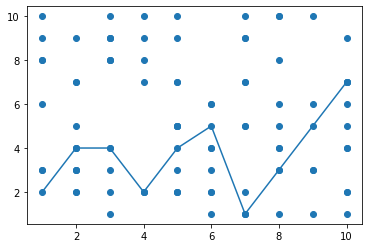

In [67]:
data = np.genfromtxt('data2.txt',delimiter='|',skip_header=1)
#print(data)
#x,y = data[0,:],data[:,0]
x = data[:,0]
y = data[:,1]
f = interp1d(x,y,kind='linear')
X = np.linspace(1,10,10)
Y = f(X)
plt.plot(X,Y)
plt.scatter(x,y)


## Integration

In [68]:
#numpy integration requires you to write reimann sum functions
#in scipy
from scipy.integrate import quad

In [71]:
#single integrals
integrand = lambda x: x**2
integral,integralError = quad(integrand,0,1)

In [72]:
#double integrals
from scipy.integrate import dblquad

In [74]:
integrand = lambda x,y: (x**2)+(y**2)
lowerlimity = lambda x: np.sin(x)
upperlimity = lambda x: np.cos(x)
integral,integralError = dblquad(integrand,0,1,lowerlimity,upperlimity)
print(integral,integralError)

0.1705302436873568 4.902076684464395e-15


In [ ]:
#n dimensional integration
from scipy.integrate import nquad

## Differential Equation

In [4]:
#solving the air friction free fall problem
#	eqn: vdot = a*(v**2) + g
#most differential equations can be handled by odeint
from scipy.integrate import odeint

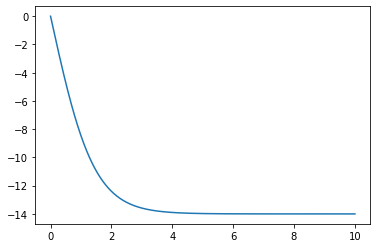

In [81]:
def vdot(v,t):
	return 0.05*v**2 - 9.81
v0 = 0
t = np.linspace(0,10,1000)
sol = odeint(vdot,v0,t)
#print(sol)
plt.plot(t,sol)

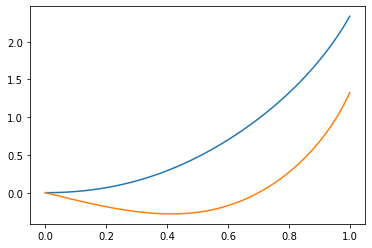

In [97]:
#coupled first order differential equations
# y1dot = y1 + y2**2 + 3*x
# y2dot = 3*y1 + y2**3 - cos(x)
#	General Technique
#	------------------
#	Vector S (y1,y2) and dS/dx = (y1dot,y2dot)
def dSdx(S,x):
	y1,y2 = S
	return [y1+y2**2+3*x,3*y1+y2**3-np.cos(x)]
S0 = [0,0] #initial condition
x = np.linspace(0,1,100)
sol = odeint(dSdx,S0,x)
#print(sol)
y1,y2 = sol[:,0],sol[:,1]
plt.plot(x,y1)
plt.plot(x,y2)
plt.show()

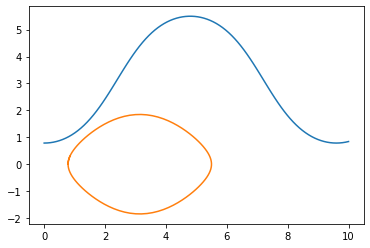

In [7]:
#Second order ODEs
#	thetadoubledot - sin(theta) = 0
#	we can use the concept of coupled DE
#	omegadot = sin(thete)
#	thetadot = omega
def dSdt(S,t):
	theta,omega = S
	return [omega,np.sin(theta)]
t = np.linspace(0,10,100)
S0 = [np.pi/4,0]
sol = odeint(dSdt,S0,t)
theta,omega = sol[:,0],sol[:,1]
plt.plot(t,theta)
plt.plot(theta,omega)
plt.show()